# Analysing Indicators for Heavy Traffic on I-94

In this project we will analyse the dataset of the traffic on the American Highway I-94, understanding which factors are the most influential for heavy traffic in this highway.

The dataset [documentation mentions](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.


In [39]:
import pandas as pd

traffic = pd.read_csv('./resources/Metro_Interstate_Traffic_Volume.csv')

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [40]:
print(traffic.head(5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [41]:
print(traffic.tail(5))

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


## Analysing Traffic dataset

The dataset has 9 columns and 48204 entries, from October 2012 until September 2018.

We have 9 columns, 6 related with weather conditions. `temp` is for temperature in kelvin, `rain_1h` and `snow_1h` are for amount of hours of raining and snowing. These three are of datatype float. `clouds_all` is of datatype int, such as `traffic_volume`, which will give us a potential frequency range to determine the severity of traffic. The remainder, `weather_main`, `weather_description`, `date_time` and `holiday` are of type object, which we already know it's of string format. Each string much resemble a category of the various weather conditions.

Let's analyse now the traffic volume.

## Analyse Traffic Volume

When you use `%matplotlib inline`, any subsequent calls to matplotlib functions, such as plt.plot() or plt.hist(), will generate the plot directly in the Jupyter Notebook, immediately below the code cell that generated it.

Overall, using `%matplotlib inline` is a convenient way to visualize and explore data directly within the Jupyter Notebook, without the need for any additional setup or configuration.

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

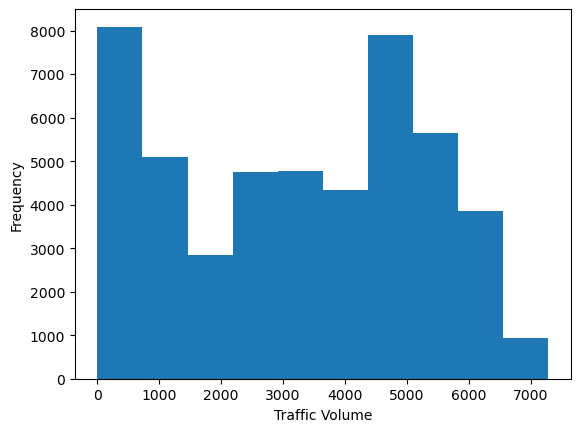

In [42]:
# Plot a histogram to examine the distribution of the traffic_volume column. Use a Pandas method.
# Use Series.describe() to look up a few statistics about the traffic_volume column.
# Note a few observations about the distribution of traffic_volume based on the histogram and the result of Series.describe().


import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

traffic['traffic_volume'].describe()




* Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars.

* We can see through the average Traffic Volume per hours is 3259 cars. 

* About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.


## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [44]:
print(type(traffic['date_time'][0]))

traffic['date_time'] = pd.to_datetime(traffic['date_time'])

print(type(traffic['date_time'][0]))

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(23877, 9)
(24327, 9)
